# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [19]:
import gmaps
import json
import requests
from api_keys import api_key
from api_keys import g_key
import random
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Access maps with unique API key
gmaps.configure(api_key=g_key)

## Generate Cities List

In [20]:
# Import cities file as DataFrame
#cities_pd = pd.read_csv("worldcities.csv")
cities_pd = pd.read_csv("cities.csv")

cities_pd.head(100)

,City_ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,0,ostrovnoy,2,RU,1558378754,72,68.05,39.51,37.50,7.16
1,1,mahebourg,75,MU,1558378503,74,-20.41,57.70,78.80,11.41
2,2,qaanaaq,25,GL,1558378755,73,77.48,-69.36,22.20,2.37
3,3,zhuhai,0,CN,1558378755,39,40.71,112.04,44.60,4.47
4,4,cape town,20,ZA,1558378755,76,-33.93,18.42,55.99,8.05
...,...,...,...,...,...,...,...,...,...,...
95,95,agirish,100,RU,1558378772,88,61.92,63.02,32.82,9.10
96,96,mataura,58,NZ,1558378772,88,-46.19,168.86,48.00,1.99
97,97,katsuura,90,JP,1558378772,93,33.93,134.50,66.20,5.82
98,98,shalinskoye,66,RU,1558378772,63,55.72,93.76,53.70,7.83


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [21]:
url = "http://api.openweathermap.org/data/2.5/weather?"
#cities = cities_pd["city_ascii"]
#api.openweathermap.org/data/2.5/weather?lat={lat}&lon={lon}&appid={your api key}
cities = cities_pd["City"]
cntry = cities_pd["Country"]

lat = []
lng = []

temper = []
hum = []
cloud = []
speed = []



nor_lat = []
nor_hum = []
nor_temper = []
nor_cloud = []
nor_speed = []

sou_lat = []
sou_hum = []
sou_temper = []
sou_cloud = []
sou_speed = []

units = "metric"
impl = "imperial"
query_url = f"{url}appid={api_key}&units={impl}&q="



### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [24]:
#  Get the indices of cities that have humidity over 100%.

# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
#by default all humidity are less than 100
for index, row in cities_pd.iterrows():
    try:
        response = requests.get(query_url + row["City"] +","+ row["Country"]).json()
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        temper.append(response['main']['temp'])
        hum.append(response['main']['humidity'])
        speed.append(response['wind']['speed'])
        cloud.append(response['clouds']['all'])
        if (response['coord']['lat'] >= 0 ):
            nor_lat.append(response['coord']['lat'])
            nor_temper.append(response['main']['temp'])
            nor_hum.append(response['main']['humidity'])
            nor_speed.append(response['wind']['speed'])
            nor_cloud.append(response['clouds']['all'])            
        else:
            sou_lat.append(response['coord']['lat'])
            sou_temper.append(response['main']['temp'])
            sou_hum.append(response['main']['humidity'])
            sou_speed.append(response['wind']['speed'])
            sou_cloud.append(response['clouds']['all'])  
    except:
        pass
    

In [25]:
cities_pd.head(100)

,City_ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,0,ostrovnoy,2,RU,1558378754,72,68.05,39.51,37.50,7.16
1,1,mahebourg,75,MU,1558378503,74,-20.41,57.70,78.80,11.41
2,2,qaanaaq,25,GL,1558378755,73,77.48,-69.36,22.20,2.37
3,3,zhuhai,0,CN,1558378755,39,40.71,112.04,44.60,4.47
4,4,cape town,20,ZA,1558378755,76,-33.93,18.42,55.99,8.05
...,...,...,...,...,...,...,...,...,...,...
95,95,agirish,100,RU,1558378772,88,61.92,63.02,32.82,9.10
96,96,mataura,58,NZ,1558378772,88,-46.19,168.86,48.00,1.99
97,97,katsuura,90,JP,1558378772,93,33.93,134.50,66.20,5.82
98,98,shalinskoye,66,RU,1558378772,63,55.72,93.76,53.70,7.83


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [26]:
complete_wea_dict = {
    "lat": lat,
    "lng": lng,
    "temper": temper,
    "hum": hum,
    "cloud": cloud,
    "speed": speed
}
complete_wea_dict_data = pd.DataFrame(complete_wea_dict)
complete_wea_dict_data

,lat,lng,temper,hum,cloud,speed
0,68.05,39.51,48.43,85,100,12.26
1,-20.41,57.70,68.00,68,75,14.99
2,77.48,-69.36,27.23,91,68,6.60
3,22.28,113.57,81.59,83,40,8.05
4,-33.93,18.42,44.31,87,18,1.12
...,...,...,...,...,...,...
539,33.97,36.66,69.80,49,0,3.11
540,18.40,-93.23,84.20,79,75,9.71
541,49.65,0.71,68.59,68,1,5.82
542,51.07,132.56,61.14,88,100,1.63


In [27]:
complete_nor_wea_dict = {
    "nor_lat": nor_lat,
    "nor_hum": nor_hum,
     "nor_temper": nor_temper,
    "nor_cloud": nor_cloud,
    "nor_speed": nor_speed
}
complete_nor_wea_dict_data = pd.DataFrame(complete_nor_wea_dict)
complete_nor_wea_dict_data    


,nor_lat,nor_hum,nor_temper,nor_cloud,nor_speed
0,68.05,85,48.43,100,12.26
1,77.48,91,27.23,68,6.60
2,22.28,83,81.59,40,8.05
3,71.69,83,43.52,9,8.28
4,57.02,95,57.47,99,7.25
...,...,...,...,...,...
376,33.97,49,69.80,0,3.11
377,18.40,79,84.20,75,9.71
378,49.65,68,68.59,1,5.82
379,51.07,88,61.14,100,1.63


In [28]:
complete_sou_wea_dict = {
    "sou_lat": sou_lat,
    "sou_hum": sou_hum,
    "sou_temper": sou_temper,
    "sou_cloud": sou_cloud,
    "sou_speed": sou_speed
}
complete_sou_wea_dict_data = pd.DataFrame(complete_sou_wea_dict)
complete_sou_wea_dict_data    


,sou_lat,sou_hum,sou_temper,sou_cloud,sou_speed
0,-20.41,68,68.00,75,14.99
1,-33.93,87,44.31,18,1.12
2,-9.80,72,78.35,0,15.99
3,-34.58,72,68.29,35,7.00
4,-42.47,89,48.36,100,3.83
...,...,...,...,...,...
158,-40.81,28,59.00,0,8.01
159,-33.01,19,60.80,0,4.70
160,-0.95,69,81.10,98,1.45
161,-0.89,78,79.45,98,0.89


In [29]:
#  Get the indices of cities that have humidity over 100%.
humd_over_more = complete_wea_dict_data.loc[complete_wea_dict_data["hum"] >100]
humd_over_more

,lat,lng,temper,hum,cloud,speed


In [30]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
complete_wea_dict_data

,lat,lng,temper,hum,cloud,speed
0,68.05,39.51,48.43,85,100,12.26
1,-20.41,57.70,68.00,68,75,14.99
2,77.48,-69.36,27.23,91,68,6.60
3,22.28,113.57,81.59,83,40,8.05
4,-33.93,18.42,44.31,87,18,1.12
...,...,...,...,...,...,...
539,33.97,36.66,69.80,49,0,3.11
540,18.40,-93.23,84.20,79,75,9.71
541,49.65,0.71,68.59,68,1,5.82
542,51.07,132.56,61.14,88,100,1.63


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

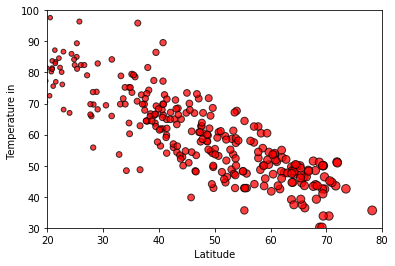

In [34]:
#This is for temperature vs latitude
x_limit = 100
x_axis = lat
data = temper
plt.scatter(x_axis, data, marker="o", facecolors="red", edgecolors="black",
            s=x_axis, alpha=0.75)
plt.ylim(30, 100)
plt.xlim(20,80)
plt.xlabel(" Latitude ")
plt.ylabel(" Temperature in  ")
plt.savefig("../output_img/temp_vs_latitude.png")
plt.show()

## Latitude vs. Humidity Plot

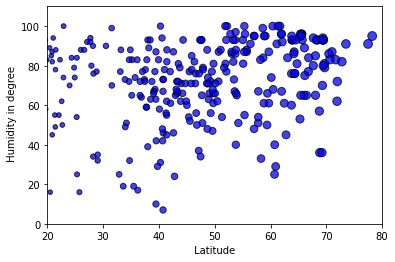

In [36]:
#This is for humidity vs latitude
x_limit = 100

x_axis = lat

data = hum
plt.scatter(x_axis, data, marker="o", facecolors="blue", edgecolors="black",
            s=x_axis, alpha=0.75)
plt.ylim(0, 110)
plt.xlim(20,80)
plt.xlabel(" Latitude ")
plt.ylabel(" Humidity in degree")
plt.savefig("../output_img/humidity_vs_latitude.png")
plt.show()

## Latitude vs. Cloudiness Plot

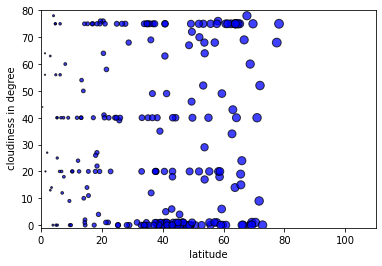

In [39]:
#This is for cloudiness vs latitude
x_limit = 100

x_axis = lat

data = cloud
plt.scatter(x_axis, data, marker="o", facecolors="blue", edgecolors="black",
            s=x_axis, alpha=0.75)
plt.ylim(-1, 80)
plt.xlim(0,110)
plt.xlabel(" latitude ")
plt.ylabel(" cloudiness in degree")
plt.savefig("../output_img/cloudiness_vs_latitude.png")
plt.show()

## Latitude vs. Wind Speed Plot

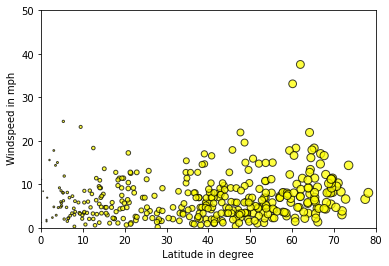

In [40]:
#This is for windspeed(mph) vs latitude
x_limit = 100

x_axis = lat

data = speed
plt.scatter(x_axis, data, marker="o", facecolors="yellow", edgecolors="black",
            s=x_axis, alpha=0.75)
plt.ylim(0, 50)
plt.xlim(0,80)
plt.xlabel(" Latitude in degree ")
plt.ylabel(" Windspeed in mph")
plt.savefig("../output_img/windspeed_vs_latitude.png")
plt.show()

## Linear Regression

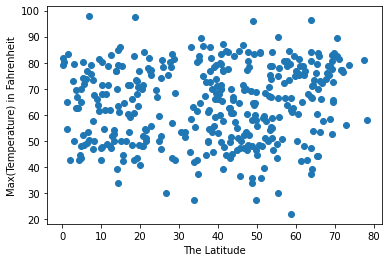

 The linear regression is y = 0.08x + 61.43


In [41]:
weather_dict = {
    "lat": nor_lat,
    "temp": nor_temper
}
weather_data = pd.DataFrame(weather_dict)
max_temp = weather_data.groupby("lat").max()["temp"]
lat_data = weather_data["lat"].unique()

weather_dict_uniq = {
    "lat_data": lat_data
}
weather_data_uniq = pd.DataFrame(weather_dict_uniq)


x_values = weather_data_uniq["lat_data"]
y_values = max_temp
(wea_slope, wea_intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
wea_regress_values = x_values* wea_slope + wea_intercept
line_eq = "y = " + str(round(wea_slope,2)) + "x + " + str(round(wea_intercept,2))
plt.scatter(x_values,y_values)
#plt.plot(x_values,y_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('The Latitude')
plt.ylabel('Max(Temperature) in Fahrenheit')
plt.savefig("../output_img/northern_max_temp_vs_latitude.png")
plt.show()
print(f' The linear regression is {line_eq}')


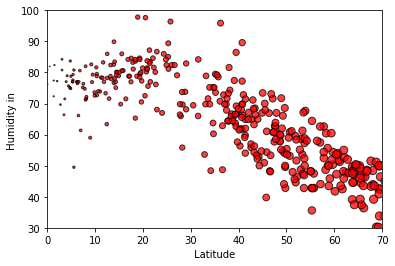

In [42]:
#This is for temperature vs latitude
x_limit = 100
x_axis = nor_lat
data = nor_temper
plt.scatter(x_axis, data, marker="o", facecolors="red", edgecolors="black",
            s=x_axis, alpha=0.75)
plt.ylim(30, 100)
plt.xlim(0,70)
plt.xlabel(" Latitude ")
plt.ylabel(" Humidity in  ")
plt.savefig("../output_img/northern_temp_vs_latitude.png")
plt.show()

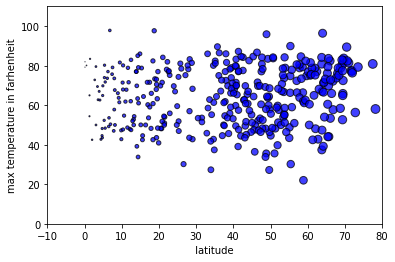

In [43]:
# max temperature vs latitude
x_limit = 100

x_axis = lat_data

data = max_temp
plt.scatter(x_axis, data, marker="o", facecolors="blue", edgecolors="black",
            s=x_axis, alpha=0.75)
plt.ylim(0, 110)
plt.xlim(-10,80)
plt.xlabel(" latitude ")
plt.ylabel("max temperature in farhenheit")
plt.show()

The r-squared is: 0.6768522335966992


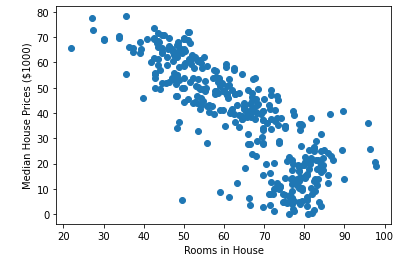

In [44]:
# Add the linear regression equation and line to plot
data = lat

#weather_dict['temp']=weather_dict["temp"].astype('float')
#weather_dict['lat']=weather_dict["lat"].astype('float')
x_values = weather_dict["temp"]
y_values = weather_dict["lat"]
(wea_slope, wea_intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
wea_regress_values = max(x_values)* wea_slope + wea_intercept
line_eq = "y = " + str(round(wea_slope,2)) + "x + " + str(round(wea_intercept,2))
plt.scatter(x_values,y_values)
#plt.plot(x_values,y_values,"r-")

plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Rooms in House')
plt.ylabel('Median House Prices ($1000)')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

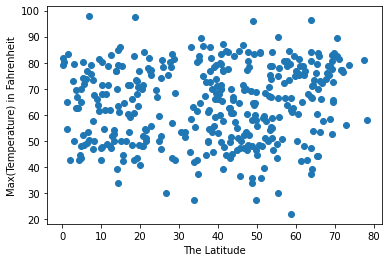

The r-squared is: 0.011059031778012672
 The linear regression is y = 0.08x + 61.43


In [47]:
#Max temperature vs Latitude, the linear regression is provided as print statement in Northen hemisphere
weather_dict = {
    "lat": nor_lat,
    "temp": nor_temper
}
weather_data = pd.DataFrame(weather_dict)


max_temp = weather_data.groupby("lat").max()["temp"]
lat_data = weather_data["lat"].unique()

weather_dict_uniq = {
    "lat_data": lat_data
}
weather_data_uniq = pd.DataFrame(weather_dict_uniq)


x_values = weather_data_uniq["lat_data"]
y_values = max_temp
(wea_slope, wea_intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
wea_regress_values = x_values* wea_slope + wea_intercept
line_eq = "y = " + str(round(wea_slope,2)) + "x + " + str(round(wea_intercept,2))
plt.scatter(x_values,y_values)
#plt.plot(x_values,y_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('The Latitude')
plt.ylabel('Max(Temperature) in Fahrenheit')
plt.savefig("../output_img/northern_max_temp_vs_latitude.png")
plt.show()
print(f"The r-squared is: {rvalue**2}")
print(f' The linear regression is {line_eq}')


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

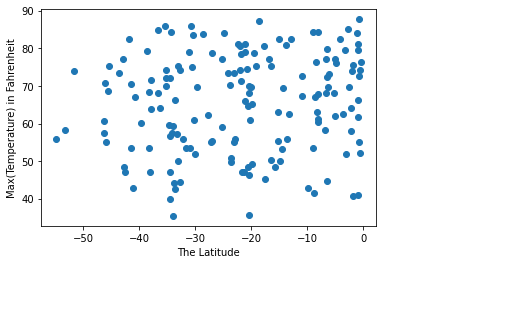

The r-squared is: 0.016391278395362606
 The linear regression is y = 0.12x + 68.0


In [48]:
#Max temperature vs Latitude, the linear regression is provided as print statement for southern hemisphere
weather_dict = {
    "lat": sou_lat,
    "temp": sou_temper
}
weather_data = pd.DataFrame(weather_dict)


max_temp = weather_data.groupby("lat").max()["temp"]
lat_data = weather_data["lat"].unique()

weather_dict_uniq = {
    "lat_data": lat_data
}
weather_data_uniq = pd.DataFrame(weather_dict_uniq)


x_values = weather_data_uniq["lat_data"]
y_values = max_temp
(wea_slope, wea_intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
wea_regress_values = x_values* wea_slope + wea_intercept
line_eq = "y = " + str(round(wea_slope,2)) + "x + " + str(round(wea_intercept,2))
plt.scatter(x_values,y_values)
#plt.plot(x_values,y_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('The Latitude')
plt.ylabel('Max(Temperature) in Fahrenheit')
plt.savefig("../output_img/southern_max_temp_vs_latitude.png")
plt.show()
print(f"The r-squared is: {rvalue**2}")
print(f' The linear regression is {line_eq}')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

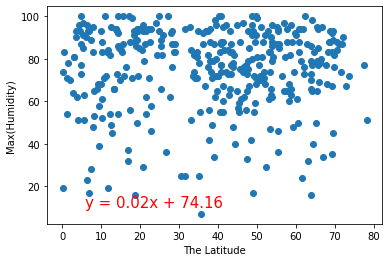

The r-squared is: 0.0005138821184425159
 The linear regression is y = 0.02x + 74.16


In [49]:
#Max humidty vs Latitude, the linear regression is provided as print statement in Northen hemisphere
weather_dict = {
    "lat": nor_lat,
    "temp": nor_hum
}
weather_data = pd.DataFrame(weather_dict)


max_temp = weather_data.groupby("lat").max()["temp"]
lat_data = weather_data["lat"].unique()

weather_dict_uniq = {
    "lat_data": lat_data
}
weather_data_uniq = pd.DataFrame(weather_dict_uniq)


x_values = weather_data_uniq["lat_data"]
y_values = max_temp
(wea_slope, wea_intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
wea_regress_values = x_values* wea_slope + wea_intercept
line_eq = "y = " + str(round(wea_slope,2)) + "x + " + str(round(wea_intercept,2))
plt.scatter(x_values,y_values)
#plt.plot(x_values,y_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('The Latitude')
plt.ylabel('Max(Humidity) ')
plt.savefig("../output_img/northern_max_humidity_vs_latitude.png")
plt.show()
print(f"The r-squared is: {rvalue**2}")
print(f' The linear regression is {line_eq}')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

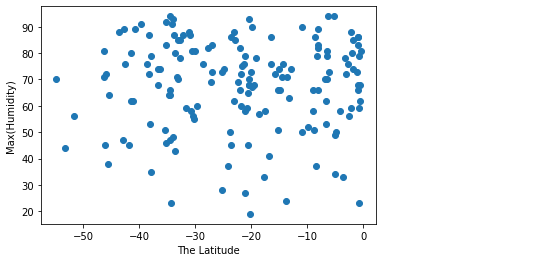

The r-squared is: 2.6579025689610426e-05
 The linear regression is y = 0.01x + 67.72


In [50]:
#Max humidty vs Latitude, the linear regression is provided as print statement in Southern hemisphere
weather_dict = {
    "lat": sou_lat,
    "temp": sou_hum
}
weather_data = pd.DataFrame(weather_dict)


max_temp = weather_data.groupby("lat").max()["temp"]
lat_data = weather_data["lat"].unique()

weather_dict_uniq = {
    "lat_data": lat_data
}
weather_data_uniq = pd.DataFrame(weather_dict_uniq)


x_values = weather_data_uniq["lat_data"]
y_values = max_temp
(wea_slope, wea_intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
wea_regress_values = x_values* wea_slope + wea_intercept
line_eq = "y = " + str(round(wea_slope,2)) + "x + " + str(round(wea_intercept,2))
plt.scatter(x_values,y_values)
#plt.plot(x_values,y_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('The Latitude')
plt.ylabel('Max(Humidity) ')
plt.savefig("../output_img/southern_max_humidity_vs_latitude.png")
plt.show()
print(f"The r-squared is: {rvalue**2}")
print(f' The linear regression is {line_eq}')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

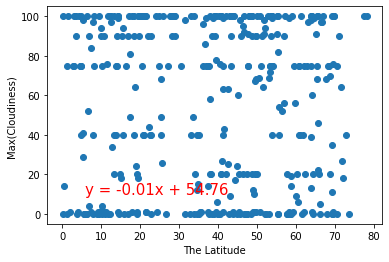

The r-squared is: 5.1592126200604325e-05
 The linear regression is y = -0.01x + 54.76


In [51]:
#Max Cloudiness vs Latitude, the linear regression is provided as print statement in Northen hemisphere
weather_dict = {
    "lat": nor_lat,
    "temp": nor_cloud
}
weather_data = pd.DataFrame(weather_dict)


max_temp = weather_data.groupby("lat").max()["temp"]
lat_data = weather_data["lat"].unique()

weather_dict_uniq = {
    "lat_data": lat_data
}
weather_data_uniq = pd.DataFrame(weather_dict_uniq)


x_values = weather_data_uniq["lat_data"]
y_values = max_temp
(wea_slope, wea_intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
wea_regress_values = x_values* wea_slope + wea_intercept
line_eq = "y = " + str(round(wea_slope,2)) + "x + " + str(round(wea_intercept,2))
plt.scatter(x_values,y_values)
#plt.plot(x_values,y_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('The Latitude')
plt.ylabel('Max(Cloudiness) ')
plt.savefig("../output_img/northern_max_cloudiness_vs_latitude.png")
plt.show()
print(f"The r-squared is: {rvalue**2}")
print(f' The linear regression is {line_eq}')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0035263772085582894


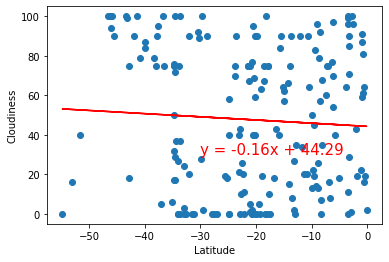

In [30]:
#Max Cloudiness vs Latitude, the linear regression is provided as print statement in Southern hemisphere
weather_dict = {
    "lat": sou_lat,
    "temp": sou_cloud
}
weather_data = pd.DataFrame(weather_dict)


max_temp = weather_data.groupby("lat").max()["temp"]
lat_data = weather_data["lat"].unique()

weather_dict_uniq = {
    "lat_data": lat_data
}
weather_data_uniq = pd.DataFrame(weather_dict_uniq)


x_values = weather_data_uniq["lat_data"]
y_values = max_temp
(wea_slope, wea_intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
wea_regress_values = x_values* wea_slope + wea_intercept
line_eq = "y = " + str(round(wea_slope,2)) + "x + " + str(round(wea_intercept,2))
plt.scatter(x_values,y_values)
#plt.plot(x_values,y_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('The Latitude')
plt.ylabel('Max(Cloudiness) ')
plt.savefig("../output_img/southern_max_cloudiness_vs_latitude.png")
plt.show()
print(f"The r-squared is: {rvalue**2}")
print(f' The linear regression is {line_eq}')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.04019723576144484


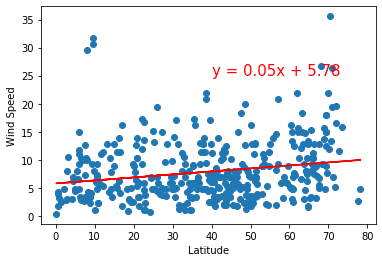

In [31]:
#Max wind speed vs Latitude, the linear regression is provided as print statement in Northen hemisphere
weather_dict = {
    "lat": nor_lat,
    "temp": nor_speed
}
weather_data = pd.DataFrame(weather_dict)


max_temp = weather_data.groupby("lat").max()["temp"]
lat_data = weather_data["lat"].unique()

weather_dict_uniq = {
    "lat_data": lat_data
}
weather_data_uniq = pd.DataFrame(weather_dict_uniq)


x_values = weather_data_uniq["lat_data"]
y_values = max_temp
(wea_slope, wea_intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
wea_regress_values = x_values* wea_slope + wea_intercept
line_eq = "y = " + str(round(wea_slope,2)) + "x + " + str(round(wea_intercept,2))
plt.scatter(x_values,y_values)
#plt.plot(x_values,y_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('The Latitude')
plt.ylabel('Max(wind speed) ')
plt.savefig("../output_img/northern_max_windspeed_vs_latitude.png")
plt.show()
print(f"The r-squared is: {rvalue**2}")
print(f' The linear regression is {line_eq}')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.017128274759839232


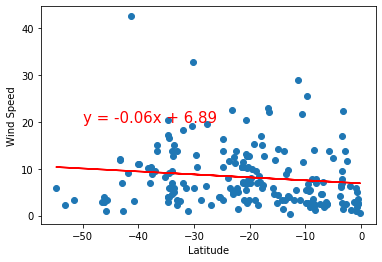

In [32]:
#Max wind speed vs Latitude, the linear regression is provided as print statement in Southern hemisphere
weather_dict = {
    "lat": sou_lat,
    "temp": sou_speed
}
weather_data = pd.DataFrame(weather_dict)


max_temp = weather_data.groupby("lat").max()["temp"]
lat_data = weather_data["lat"].unique()

weather_dict_uniq = {
    "lat_data": lat_data
}
weather_data_uniq = pd.DataFrame(weather_dict_uniq)


x_values = weather_data_uniq["lat_data"]
y_values = max_temp
(wea_slope, wea_intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
wea_regress_values = x_values* wea_slope + wea_intercept
line_eq = "y = " + str(round(wea_slope,2)) + "x + " + str(round(wea_intercept,2))
plt.scatter(x_values,y_values)
#plt.plot(x_values,y_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('The Latitude')
plt.ylabel('Max(wind speed) ')
plt.savefig("../output_img/southern_max_windspeed_vs_latitude.png")
plt.show()
print(f"The r-squared is: {rvalue**2}")
print(f' The linear regression is {line_eq}')